# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Sklearn imports
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,validation_curve
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [30]:
train_data = pd.read_csv("C://Users//dell//Downloads//train_Df64byy.csv")
test_data = pd.read_csv("C://Users//dell//Downloads//test_YCcRUnU.csv")

In [31]:
train_data.head()


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0


In [32]:
test_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [7]:
print(train_data.shape)
print(test_data.shape)

(50882, 14)
(21805, 13)


In [36]:
train_data.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [37]:
test_data.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000
mean,61785.000000,1748.737491,44.877734,42.748085,2.440085,15.138363,14220.306581
std,6294.705646,1438.358949,17.254898,17.269112,0.807377,6.302805,6497.996164
min,50883.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2152.000000
25%,56334.000000,535.000000,28.000000,27.000000,2.000000,12.000000,9285.000000
50%,61785.000000,1392.000000,44.000000,41.000000,2.440085,17.000000,13244.000000
75%,67236.000000,2712.000000,59.000000,57.000000,3.000000,20.000000,18201.600000
max,72687.000000,6185.000000,75.000000,75.000000,4.000000,22.000000,43776.000000


# Checking for Null Values

In [28]:
train_data.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [9]:
test_data.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

# Imputing Null Values

In [29]:
# Function to impute missing values with mean or median
def fill_null_values(dataset, value):
    nulls = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False))
    nulls = nulls[nulls>0]
    nulls.columns = ['Null Count']
    nulls.index.name = 'Feature'
    

    for column in nulls[nulls["Null Count"]> 0].index:
        if dataset[column].dtype == np.number and value == 0:
            dataset[column].fillna(dataset[column].mean(), inplace = True)
        elif value == 1:
            dataset[column].fillna(dataset[column].median(), inplace = True)
        else:
            dataset[column].fillna("NaN", inplace = True)
    print(dataset.isnull().sum())
    return dataset

dataframe=fill_null_values(train_data,0)

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64


In [33]:
dataframe=fill_null_values(test_data,0)

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64


# Check for class imbalance

In [34]:
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(train_data['Response'])

0    76.005267
1    23.994733
Name: Response, dtype: float64

#  Check for outliers

In [38]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(train_data)

,Feature,Number of Outliers
0,ID,0
1,Region_Code,201
2,Upper_Age,0
3,Lower_Age,0
4,Holding_Policy_Type,0
5,Reco_Policy_Cat,0
6,Reco_Policy_Premium,821
7,Response,12209


Will ignore outliers in Response variable as the value is boolean with 0 or 1

# Identifying Categorical and Numerical variables for EDA

In [43]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
    
numeric_columns = numeric_features(train_data)
print("Numerical Features")
print(numeric_columns)

print("===="*20)



# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(train_data)
print("Categorical Features:")
print(categorical_columns)

Numerical Features
   ID  Region_Code  Upper_Age  Lower_Age  Holding_Policy_Type  \
0   1         3213         36         36                  3.0   
1   2         1117         75         22                  NaN   
2   3         3732         32         32                  1.0   
3   4         4378         52         48                  3.0   
4   5         2190         44         44                  1.0   

   Reco_Policy_Cat  Reco_Policy_Premium  Response  
0               22              11628.0         0  
1               22              30510.0         0  
2               19               7450.0         1  
3               19              17780.0         0  
4               16              10404.0         0  
Categorical Features:
  City_Code Accomodation_Type Reco_Insurance_Type Is_Spouse Health Indicator  \
0        C3            Rented          Individual        No               X1   
1        C5             Owned               Joint        No               X2   
2        C5     

# Analysis of categorical variables

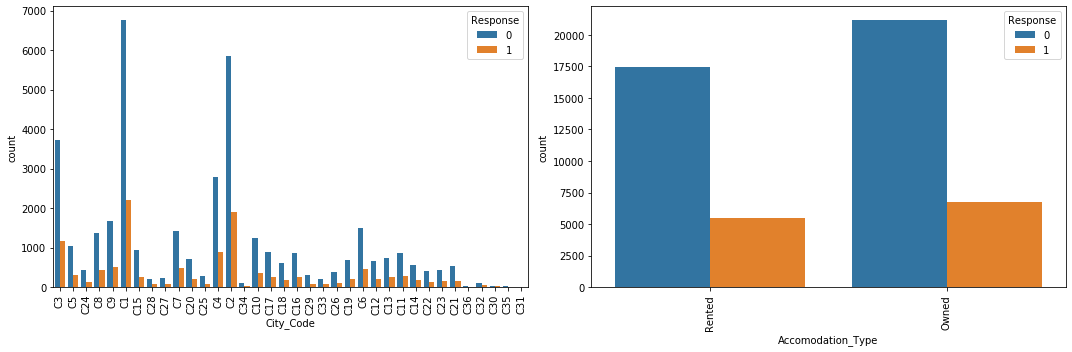

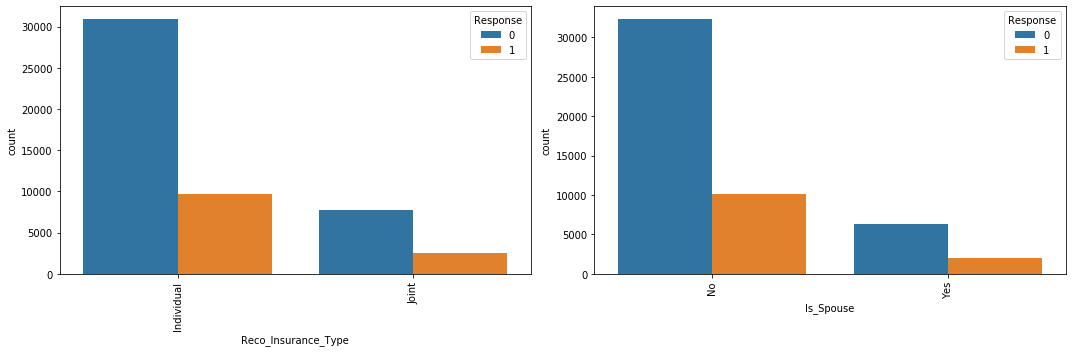

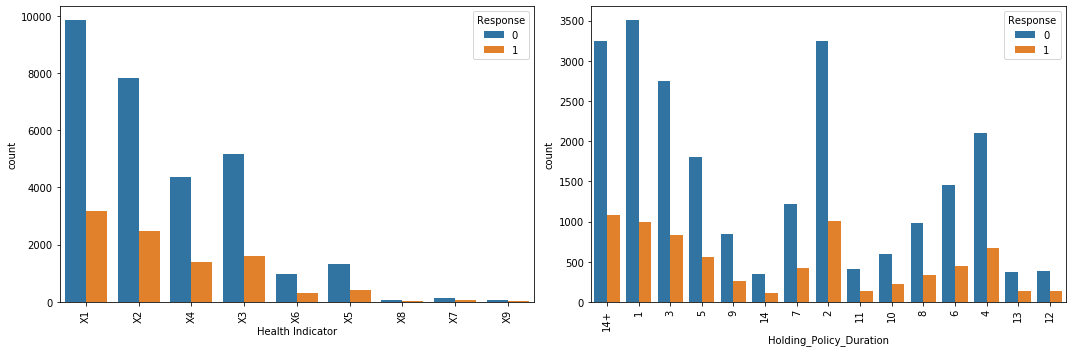

In [44]:
def bivariate_analysis_categorical(dataframe,target):
    categorical_columns = dataframe.select_dtypes(exclude=np.number).columns
    for i in range(0,len(categorical_columns),2):
        if len(categorical_columns) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.countplot(x=dataframe[categorical_columns[i]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.subplot(122)            
            sns.countplot(dataframe[categorical_columns[i+1]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


bivariate_analysis_categorical(train_data, train_data['Response'])

# Split in train and test for classification

In [52]:
from sklearn.preprocessing import LabelEncoder
for i in train_data.columns:
    if train_data[i].dtype=='object':
        le=LabelEncoder()
        le.fit(list(train_data[i].values))
        train_data[i]= le.transform(list(train_data[i].values))

In [59]:
train_data["Average_Age"] = train_data[['Upper_Age','Lower_Age']].mean(axis=1)

In [60]:
train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,average_age,Average_Age
0,1,22,3213,1,0,36,36,0,0,6,3.0,22,11628.0,0,36.0,36.0
1,2,31,1117,0,1,75,22,0,1,15,NaN,22,30510.0,0,48.5,48.5
2,3,31,3732,0,0,32,32,0,9,0,1.0,19,7450.0,1,32.0,32.0
3,4,16,4378,0,1,52,48,0,0,6,3.0,19,17780.0,0,50.0,50.0
4,5,34,2190,1,0,44,44,0,1,8,1.0,16,10404.0,0,44.0,44.0


In [56]:
# To get an accurate number of class distribution for target variable
from collections import Counter
counter = Counter(train_data['Response'])
print(counter)

Counter({0: 38673, 1: 12209})


In [100]:
pred1 = ["ID","City_Code","Accomodation_Type","Reco_Insurance_Type","Is_Spouse","Health Indicator",
                        "Holding_Policy_Duration","Reco_Policy_Cat","Average_Age"]

pred = train_data[pred]
target = train_data["Response"]


# Balancing response variable

In [101]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
data,target = oversample.fit_resample(pred, target)
# summarize class distribution
counter = Counter(target)
print(counter)


Counter({0: 38673, 1: 38673})


In [103]:
RANDOM_SEED = 123
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(data, target,random_state=RANDOM_SEED)
print(X_train.shape, y_train.shape)


(58009, 9) (58009,)


# Logistic Regression Model

In [121]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_log_pred = logreg.predict(X_test)
print("ROC_AUC:",metrics.roc_auc_score(y_test, y_log_pred))

ROC_AUC: 0.5400684207043254


# Decision Tree Classifier Model

In [122]:
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train,y_train)
y_pred_dt = decision_tree.predict(X_test)
print("ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_dt))

ROC_AUC: 0.8304631107368027


# Random Forest Classifier

In [123]:
from sklearn import metrics
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
print("ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_rfc))


ROC_AUC: 0.8949903536694045


# Gradient Boosting Classifier

In [105]:
gbc_model = GradientBoostingClassifier(n_estimators=250,max_depth=10)
gbc_model.fit(X_train,y_train)
print('ROC_AUC:',round(roc_auc_score(y_test,gbc_model.predict(X_test)),6))

ROC_AUC: 0.835145


# Cross Validation of model fit with Test data

In [141]:
#test_data = pd.read_csv("C://Users//dell//Downloads//test_YCcRUnU.csv")
test_data["Average_Age"] = test_data[['Upper_Age','Lower_Age']].mean(axis=1)
test_data.drop(["Upper_Age","Region_Code","Lower_Age","Holding_Policy_Type","Reco_Policy_Premium"],axis=1,inplace=True)

for i in test_data.columns:
    if test_data[i].dtype=='object':
        le=LabelEncoder()
        le.fit(list(test_data[i].values))
        test_data[i]= le.transform(list(test_data[i].values))
        

test_data.to_csv('final_test.csv',index=False)
test_data.head()

,ID,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Reco_Policy_Cat,Average_Age
0,50883,0,0,0,0,9,11,5,30.0
1,50884,30,0,1,1,0,8,18,68.5
2,50885,0,1,0,0,2,7,17,28.0
3,50886,22,1,0,0,2,8,18,23.0
4,50887,0,0,0,0,2,15,5,75.0


In [138]:
submission=pd.read_csv("C://Users//dell//Downloads//sample_submission_QrCyCoT.csv")
submission.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [142]:
#Gradient Boost Classifier Validation
predictions_gbc = gbc_model.predict(test_data)
submission['Response'] = predictions_gbc
submission.to_csv("submission_gbc.csv",index=False) 


In [144]:
#Random Forest Model Evaluation
predictions_rfc = rfc.predict(test_data)
submission['Response'] = predictions_rfc
submission.to_csv("submission_rfc.csv",index=False) 

In [145]:
#Decision Tree Model Evaluation
predictions_dt = decision_tree.predict(test_data)
submission['Response'] = predictions_dt
submission.to_csv("submission_dt.csv",index=False) 

In [146]:
#Logistic Regression Evaluation
predictions_logreg = logreg.predict(test_data)
submission['Response'] = predictions_logreg
submission.to_csv("submission_logreg.csv",index=False) 